# Detection of COVID-19 on CT scans using Machine Learning Algorithms

## Raj Asarpota Senior Project CS 4395-10750

In [1]:
import numpy as np
import seaborn as sns
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# Visualization
### Loading COVID-19/Normal CT Scans in grid plot

In [2]:
import glob
imagePatches = glob.glob(r'C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (1).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (10).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (100).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (101).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (102).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (103).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (104).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (105).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (106).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class1\COVID-19 (107).png


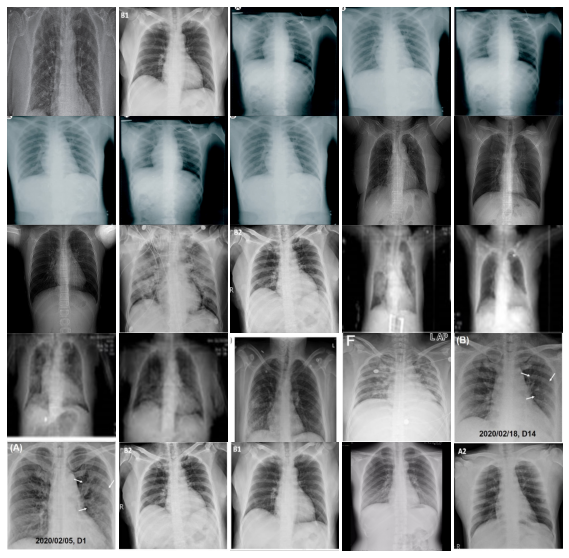

In [3]:
# Plot Multiple COVID-19 Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

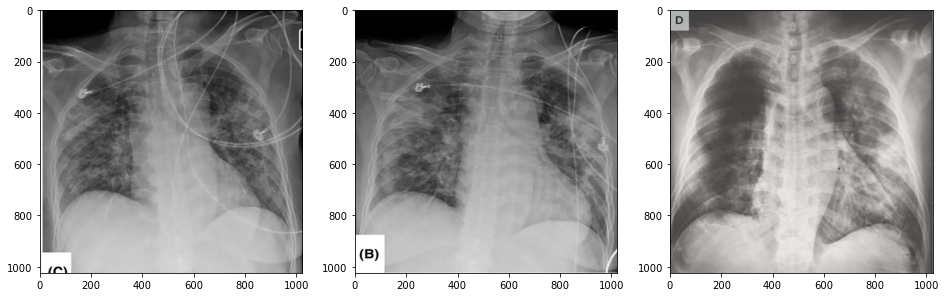

In [4]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [5]:
imagePatches2 = glob.glob(r'C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\*.png', recursive=True)
for filename in imagePatches2[0:10]:
    print(filename)

C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (1).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (10).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (100).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (101).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (102).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (103).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (104).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (105).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (106).png
C:\Users\Administrator\Desktop\Covid19Test\Train\Class2\NORMAL (107).png


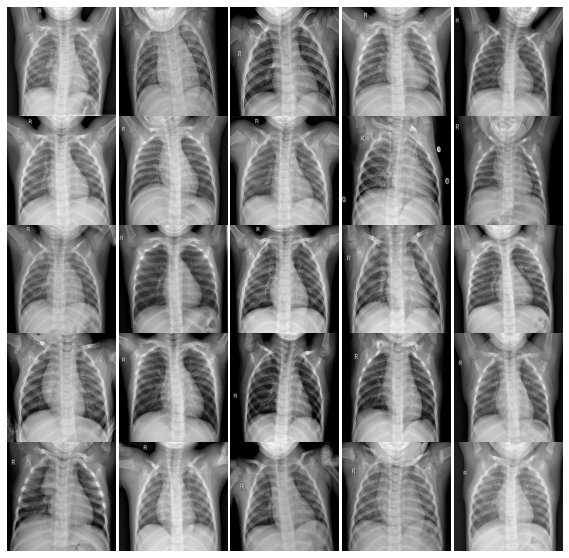

In [6]:
# Plot Multiple NORMAL Images
bunchOfImages2 = imagePatches2
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages2[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

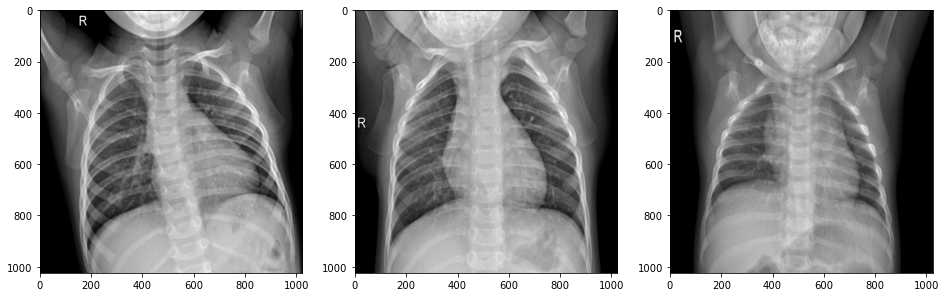

In [7]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches2)

# Function get_data 
### Loads the data and labels  from the given folder

In [8]:
def get_data(folder):
    X = []
    y = []

    for rayx_type in os.listdir(folder):
        if not rayx_type.startswith('.'):
            if rayx_type in ['Class1']:
                label = '0'   #Labels COVID Images
            else:
                label = '1'   #labels NORMAL Images
            for image_filename in os.listdir(folder + rayx_type):
                img_file = cv2.imread(folder + rayx_type + '/' + image_filename, 0)
                if img_file is not None:
                    # Downsample the image to 224, 224
                    image = cv2.resize(img_file, (224, 224)) #contains image file name and resized image dimmensions 
                    img_arr = np.asarray(image)  #converts input into array
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)   #converts input into array
    y = np.asarray(y)   #converts input into array
    return X,y


# Loading and Reshaping COVID-19/Normal Dataset

In [9]:
X_train, y_train = get_data(r'C:\Users\Administrator\Desktop\Covid19Test\Train\\')
X_test, y_test = get_data(r'C:\Users\Administrator\Desktop\Covid19Test\Test\\')

#scikit-learn expects 2d num arrays for the training dataset for a fit function. 
#Dataset reshaping from a 3D array to a 2D array

print(X_train.shape) #outputs 3D array: the amount of sample images, and both image dimmensions 

print(y_train.shape) #outputs the amount of labels created (should match the amount of sample images)

nsamples, nx, ny = X_train.shape  #nsamples = amount of sample images, nx = first image dimmension, ny = second image dimmension
nsamples2, nx2, ny2 = X_test.shape
X_train_2D = X_train.reshape((nsamples,nx*ny))
X_test_2D = X_test.reshape((nsamples2,nx2*ny2))

print(X_train_2D.shape) #outputs reformed 2D array: the amount of sample images, and combined image dimmensions

encoder = LabelEncoder() #normalizes labels
encoder.fit(y_train)
y_train_2D = encoder.transform(y_train)
y_test_2D = encoder.transform(y_test)



(398, 224, 224)
(398,)
(398, 50176)


# Logistic Regression Model

### Logistic Regression Optimization

In [10]:
%%time

param_grid = {'C':[.001, .01, .1, 1, 10, 100, 1000]}
gs = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5)
gs_fitted_lr = gs.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset
gs_fitted_lr.best_score_

Wall time: 1min 37s


0.9722784810126581

In [11]:
gs_fitted_lr.best_params_

{'C': 10}

In [12]:
gs_fitted_lr.best_estimator_

LogisticRegression(C=10, max_iter=1000)

### Logistic Regression Prediction Classification Report / Time

In [13]:
%%time

y_prediction = gs_fitted_lr.best_estimator_.predict(X_test_2D)
print(y_prediction)
print(classification_report(y_test_2D, y_prediction))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

Wall time: 244 ms


### Logistic Regression ROC Curve

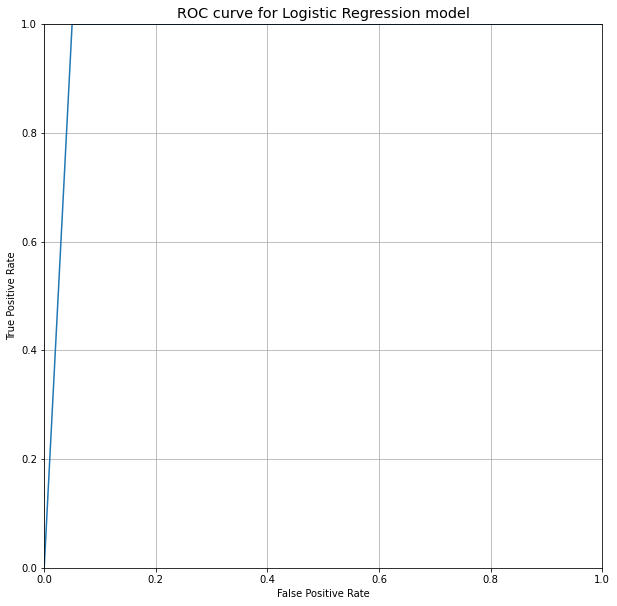

In [14]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_prediction)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Logistic Regresion Confusion Matrix

Confusion Matrix without Normalization


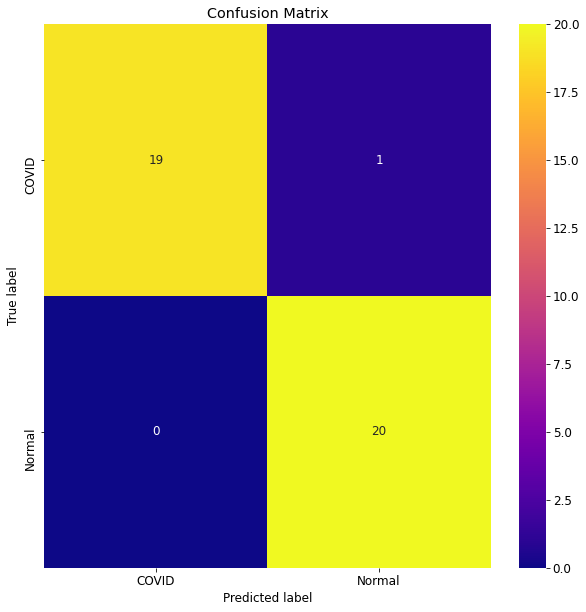

Confusion Matrix with Normalized Values


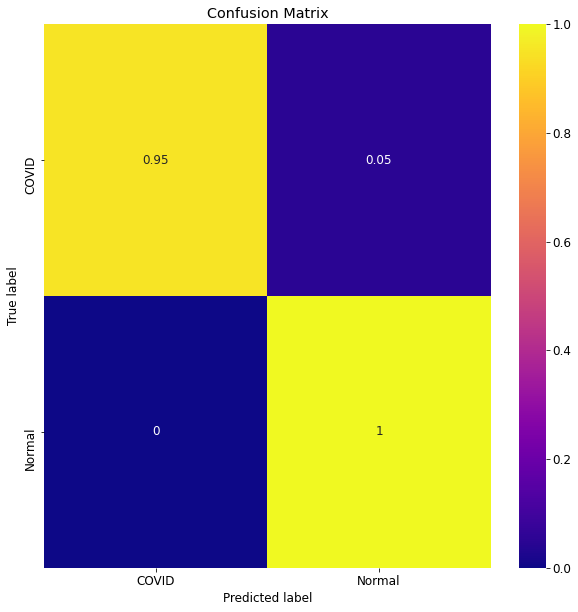

In [15]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_prediction,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [16]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_2D, y_prediction)


cm = confusion_matrix(y_test_2D, y_prediction)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 0 20]]
acc: 0.9750
sensitivity: 0.9500
specificity: 1.0000


When the logistic regression model fit both the X_train and y_train (the 400 COVID/Normal training images and data labels), it was able to predict up to 97% accuracy when given the 20 COVID test image and 20 Normal test images trying the best estimated C-hyper parameter.

We are also obtaining 95% sensitivity and 100% specificity implying that:

Of patients that do have COVID-19 (i.e., true positives), we could accurately identify them as “COVID-19 positive” 95% of the time using our model.
Of patients that do not have COVID-19 (i.e., true negatives), we could accurately identify them as “COVID-19 negative” 100% of the time using our model.

0 -> predicted COVID

1 -> predicted Normal

# KNeighbors Model

### KNN Optimization

In [17]:
%%time

param_grid = {'n_neighbors': [3,5,7,9,11], 'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
gs_fitted_knn = gs.fit(X_train_2D,y_train_2D) #training the model using reformatted training dataset
gs_fitted_knn.best_score_

Wall time: 52.5 s


0.9598101265822784

In [18]:
gs_fitted_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

After the paramater optimization was applied on the KNN model, we get the best hyper_parameter are manhattan distance with k = 3.

### KNN Classification Report / Time

In [19]:
%%time
y_predictionKNN =gs_fitted_knn.best_estimator_.predict(X_test_2D)
print(y_predictionKNN)
print(classification_report(y_test_2D, y_predictionKNN))
print(confusion_matrix(y_test_2D, y_predictionKNN))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

[[19  1]
 [ 0 20]]
Wall time: 1.63 s


### KNN ROC Curve

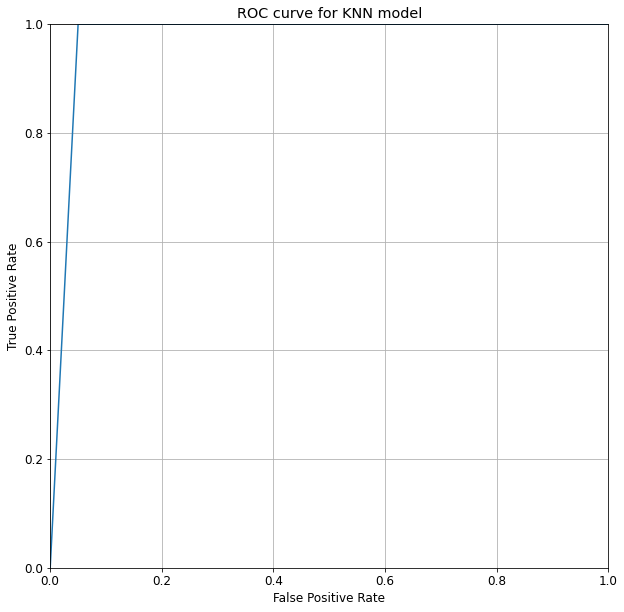

In [20]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predictionKNN)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### KNN Confusion Matrix

Confusion Matrix without Normalization


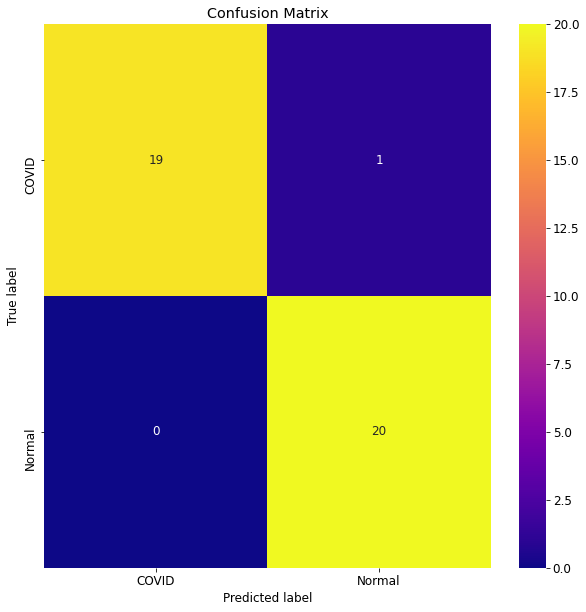

Confusion Matrix with Normalized Values


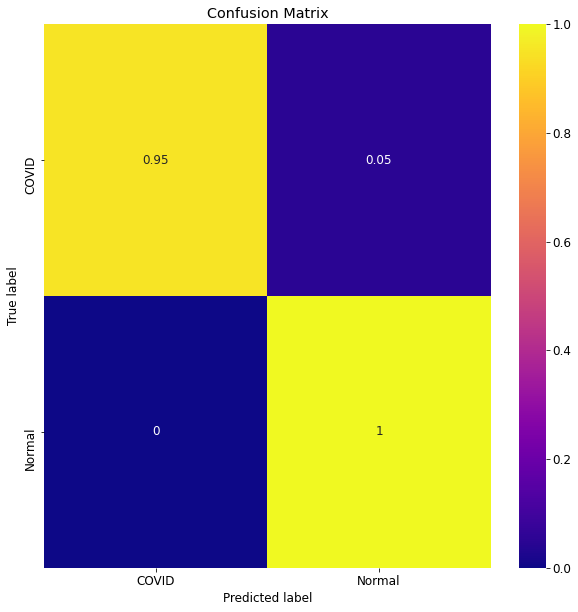

In [21]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predictionKNN,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [22]:
score = accuracy_score(y_test_2D, y_predictionKNN)


cm = confusion_matrix(y_test_2D, y_predictionKNN)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 0 20]]
acc: 0.9750
sensitivity: 0.9500
specificity: 1.0000


When the optimized KNN model fit both the X_train and y_train (the 398 COVID/Normal training images and data labels), it was able to predict up to 97% accuracy when given the 20 COVID test image and 20 Normal test images.

We are also obtaining 95% sensitivity and 100% specificity implying that:

Of patients that do have COVID-19 (i.e., true positives), we could accurately identify them as “COVID-19 positive” 95% of the time using our model.
Of patients that do not have COVID-19 (i.e., true negatives), we could accurately identify them as “COVID-19 negative” 100% of the time using our model.

0 -> predicted COVID

1 -> predicted Normal

# Decision Tree Model

In [23]:
%%time

tree =DecisionTreeClassifier()
tree.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset

Wall time: 5.65 s


DecisionTreeClassifier()

### Decision Tree Classification Report / Time

In [24]:
%%time


y_predTree=tree.predict(X_test_2D)
print(y_predTree)
print(classification_report(y_test_2D,y_predTree))
print(confusion_matrix(y_test_2D, y_predTree))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40

[[18  2]
 [ 3 17]]
Wall time: 20.9 ms


### Decision Tree ROC Curve

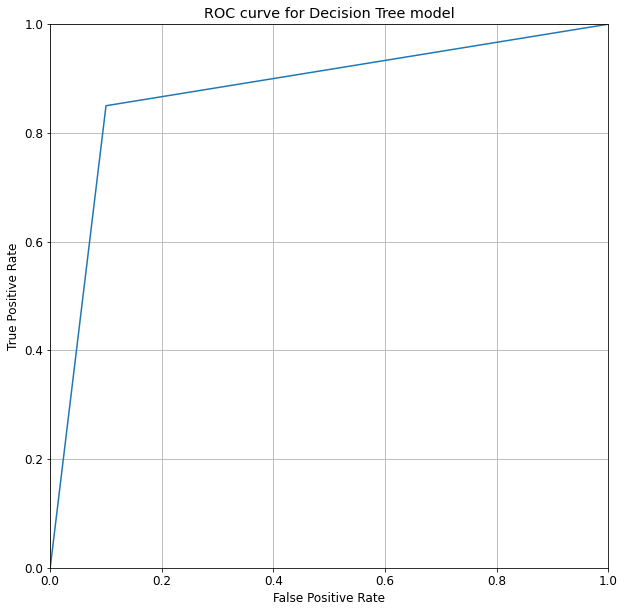

In [25]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predTree)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Decision Tree Confusion Matrix

Confusion Matrix without Normalization


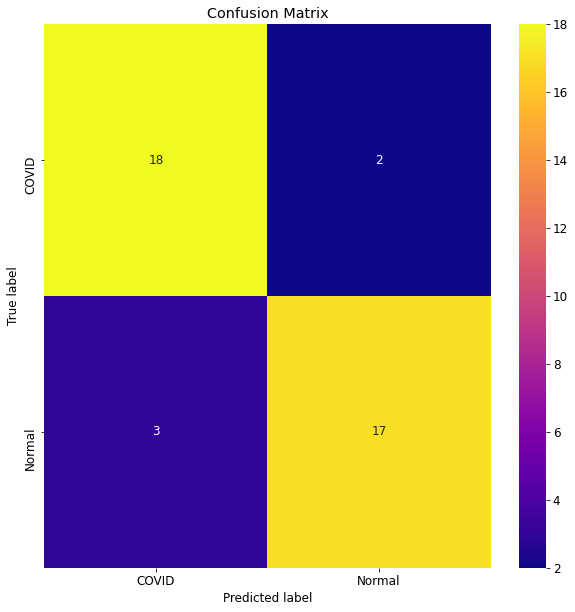

Confusion Matrix with Normalized Values


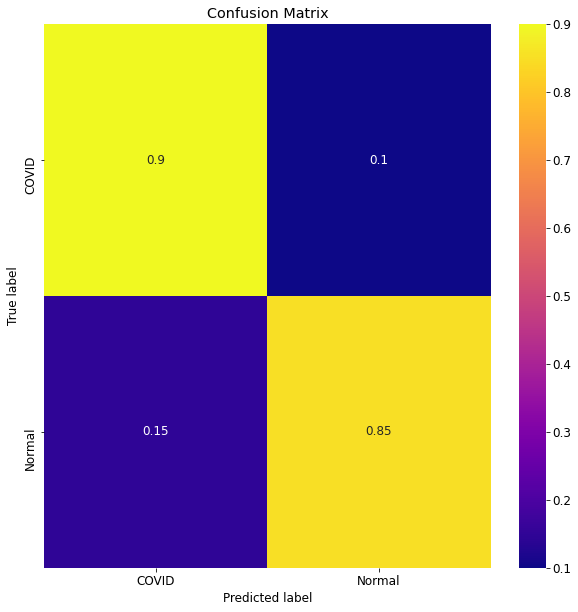

In [26]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predTree,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [27]:
score = accuracy_score(y_test_2D, y_predTree)


cm = confusion_matrix(y_test_2D, y_predTree)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[18  2]
 [ 3 17]]
acc: 0.8750
sensitivity: 0.9000
specificity: 0.8500


When the Decision Tree Model fit both the X_train and y_train (the 398 COVID/Normal training images and data labels), it was able to predict up to 85% accuracy when given the 20 COVID test image and 20 Normal test images.

We are also obtaining 90% sensitivity and 85% specificity implying that:

Of patients that do have COVID-19 (i.e., true positives), we could accurately identify them as “COVID-19 positive” 90% of the time using our model.
Of patients that do not have COVID-19 (i.e., true negatives), we could accurately identify them as “COVID-19 negative” 85% of the time using our model.

0 -> predicted COVID


1 -> predicted Normal

# Random Forest Model

In [28]:
%%time

forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset

Wall time: 1.49 s


RandomForestClassifier(max_depth=3, random_state=0)

### Random Forest Classification Report / Time

In [29]:
%%time 


y_predForest=forest.predict(X_test_2D)
print(y_predForest)
print(classification_report(y_test_2D,y_predForest))
print(confusion_matrix(y_test_2D, y_predForest))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

[[19  1]
 [ 1 19]]
Wall time: 25.9 ms


### Random Forest ROC Curve

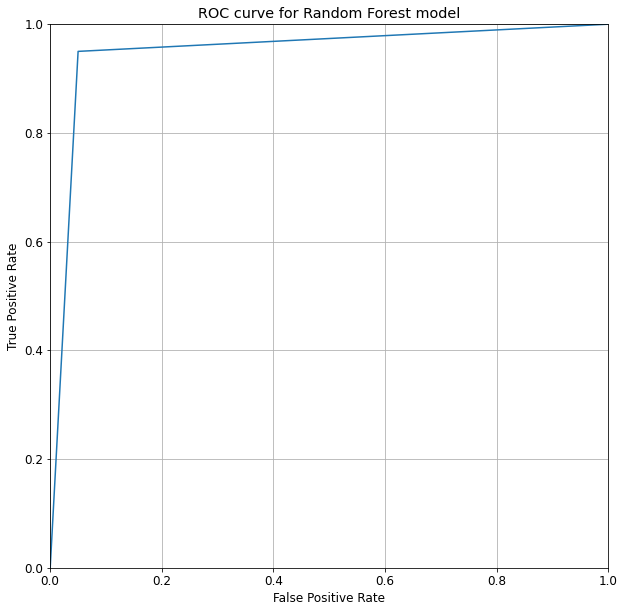

In [30]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predForest)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Random Forest Confusion Matrix

Confusion Matrix without Normalization


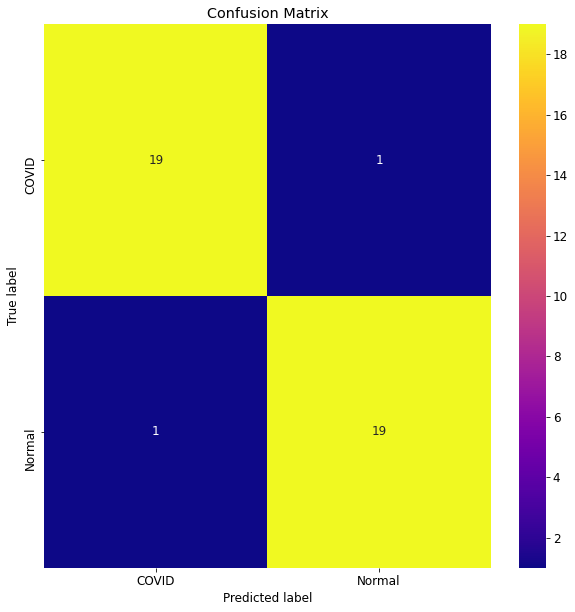

Confusion Matrix with Normalized Values


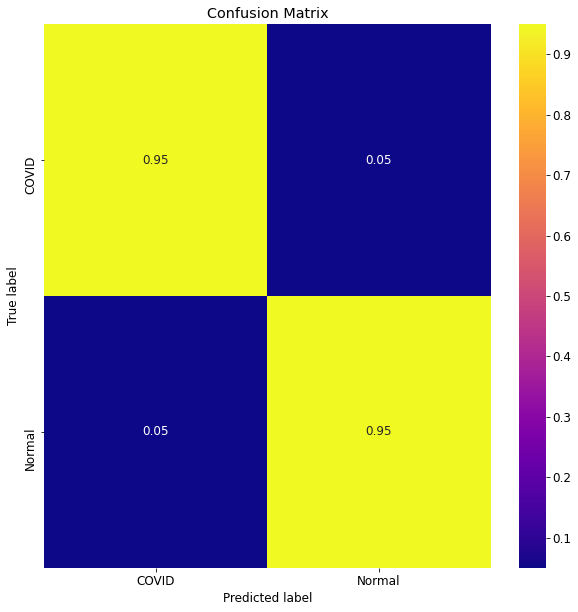

In [31]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predForest,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [32]:
score = accuracy_score(y_test_2D, y_predForest)


cm = confusion_matrix(y_test_2D, y_predForest)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 1 19]]
acc: 0.9500
sensitivity: 0.9500
specificity: 0.9500


When the Random Forest Model fit both the X_train and y_train (the 400 COVID/Normal training images and data labels), it was able to predict up to 95% accuracy when given the 20 COVID test image and 20 Normal test images.


We are also obtaining 95% sensitivity and 95% specificity implying that:

Of patients that do have COVID-19 (i.e., true positives), we could accurately identify them as “COVID-19 positive” 95% of the time using our model.
Of patients that do not have COVID-19 (i.e., true negatives), we could accurately identify them as “COVID-19 negative” 95% of the time using our model.

0 -> predicted COVID

1 -> predicted Normal